In [ ]:
# Importación de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
# Importando dataset

df = pd.read_csv("https://raw.githubusercontent.com/levraines/data/master/precio_gasolina.csv", sep = ';', decimal = ',')

In [ ]:
# Visualizando dataset

df.head()

,Provincia,Localidad,Codigo_postal,Direccion,Margen,Toma_de_datos,Precio,Rotulo,Tipo_venta,Rem,Horario,Tipo_servicio,Fecha_extraccion
0,SANTA CRUZ DE TENERIFE,CUESTA LA,38320,AVENIDA LOS MENCEYES 223,D,01 08 2020 1353,0.758,PCAN,P,dm,LD 24H,LD 24H A,01 08 2020
1,SANTA CRUZ DE TENERIFE,LA LAGUNA,38200,CARRETERA TF111 KM 8 346,D,01 08 2020 0900,0.759,OCEANO,P,dm,LS 06002200 D 07002200,LS 06002200 A D 07002200 A,01 08 2020
2,SANTA CRUZ DE TENERIFE,SANTA CRUZ DE TENERIFE,38110,CALLE LAURA GROTE DE LA PUERTA 2,D,27 07 2020 1202,0.769,GMOIL,P,dm,LV 24H S 06002000 D 08001500,LV 24H A S 06002000 A D 08001500 A,01 08 2020
3,SANTA CRUZ DE TENERIFE,SANTA CRUZ DE TENERIFE,38010,POLIGONO EL MAYORAZGO SN,N,29 07 2020 0000,0.789,TGASTU TREBOL,P,dm,LS 07302100 D 08001400,LS 07302100 A D 08001400 A,01 08 2020
4,SANTA CRUZ DE TENERIFE,ADEJE,38670,CALLE CHARFA ESQUINA AVENIDA LAS PALMITAS SN,D,27 07 2020 1159,0.789,GMOIL,P,dm,LS 07002200 D 09001600,LS 07002200 A D 09001600 A,01 08 2020


In [ ]:
# Resumen información del fichero
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9991 entries, 0 to 9990
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Provincia         9991 non-null   object 
 1   Localidad         9991 non-null   object 
 2   Codigo_postal     9991 non-null   int64  
 3   Direccion         9991 non-null   object 
 4   Margen            9991 non-null   object 
 5   Toma_de_datos     9991 non-null   object 
 6   Precio            9991 non-null   float64
 7   Rotulo            9990 non-null   object 
 8   Tipo_venta        9991 non-null   object 
 9   Rem               9991 non-null   object 
 10  Horario           9991 non-null   object 
 11  Tipo_servicio     9845 non-null   object 
 12  Fecha_extraccion  9991 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1014.8+ KB
None


In [ ]:
print(df["Tipo_servicio"].value_counts())

LD 24H  A                                                 3318
LD 06002200  A                                            1180
LD 07002300  A                                             616
LD 07002200  A                                             234
LD 06002300  A                                             214
                                                          ... 
LV 00000800  D   08001600  A   16002359  D  SD 24H  D        1
LV 06302200  P  S 08001430  P                                1
LS 07302230  A  D 09002230  A                                1
V 08002000  A                                                1
L 09002000  A                                                1
Name: Tipo_servicio, Length: 1613, dtype: int64


**Análisis del tipo de variables con que se trabajará:**

**1. Provincia**: es la demarcación administrativa española, en la actualidad hay 50 provincias en todo el territorio español. La naturaleza de la variable es **cualitativa nominal**, a nivel de dataset viene expresada como una variable de tipo **object** (cualitativa nominal) porque las provincias no tienen ningún orden y a nivel de análisis de datos corresponde a una variable de **clasificación**.

**2. Localidad:** corresponde a una división administrativa o territorial formada por un conjunto de casas o edificios, en cantidad, forma, tamaño y proximidad muy variable. La naturaleza de la variable es **cualitativa nominal**, ya que tampoco tiene ningún orden o ninguna localidad es más importante que otra. A nivel de dataset viene expresada como una variable de tipo **object** (cualitativa nominal) y a nivel de análisis de datos corresponde a una variable de **clasificación**.

**3. Codigo Postal:** es un esquema que se asigna a distintas zonas o lugares de un país, un código que sirve para facilitar y mecanizar el encaminamiento de una pieza de correo. La naturaleza de la variable es **cualitativa nominal** y aunque esté expresada en números en realidad no representa una valoración numérica, sino más bien una etiqueta, a nivel de dataset viene expresada como una variable de tipo **integer** (cuantitativa discreta) y a nivel de análisis de datos corresponde a una variable de **clasificación**, porque corresponde a lugares mutuamente excluyentes. 

**4. Dirección:** corresponde al sitio geográfico en específico donde está ubicada la gasolinera en cuestión. La naturaleza de la variable es **cualitativa nominal**, a nivel de dataset viene expresada como una variable de tipo **object** (cualitativa nominal) y a nivel de análisis de datos corresponde a una variable de **clasificación**.

**5. Margen:** corresponde al lado en que se encuentra ubicada una gasolinera, que puede ser "D" derecho, "I", izquierdo y "n" de no aplica. La naturaleza de la variable es **cualitativa nominal**, a nivel de dataset viene expresada como una variable de tipo **object** (cualitativa nominal), ya que la izquierda no es más importante que la derecha o que tener un "no aplica", y a nivel de análisis de datos corresponde a una variable de **clasificación**.

**6. Toma de datos:** corresponde a la fecha (día, mes y año) y hora (hora/horas, minuto/minutos) en que se han tomado los datos de la gasolina. La naturaleza de la variable es **cuantitativa continua**, a nivel de dataset viene expresada como una variable de tipo **object** (cualitativa ordinal), ya que si nos ponemos a analizar la mayoría de las tomas ocurrieron el día 01 08 2020 0000 con 2857 datos, pero hay otras fechas que sí siguen un orden de acuerdo a la fecha y a la hora de la toma de datos. Por último a nivel de análisis de datos corresponde a una variable de **clasificación**, porque sus categorías o grupos son mutuamente excluyentes.

**7. Precio:** corresponde al valor monetario que tiene la gasolina de 95 octanos en España. La naturaleza de la variable es **cuantitativa continua**, a nivel de dataset viene expresada como una variable de tipo **float** (cuantitativa continua) y a nivel de análisis de datos corresponde a una variable **analítica**.

**8. Rótulo:** este corresponde al nombre de la gasolinera. La naturaleza de la variable es **cualitativa nominal**, a nivel de dataset viene expresada como una variable de tipo **object** (cualitativa nominal) ya que las gasolineras no se ordenan por un rótulo en específico y no hay un orden establecido y a nivel de análisis de datos corresponde a una variable de **clasificación**.

**9. Tipo de venta:** indica el tipo de venta: al público en general o venta restringida a socios o cooperativistas, además existen otras categorías como "A" y "N", que como no se tiene mayor información se agrupan como "otras". La naturaleza de la variable es **cualitativa nominal**, a nivel de dataset viene expresada como una variable de tipo **object** (cualitativa nominal), ya que ninguna de las categorías es más importante que la otra y a nivel de análisis de datos corresponde a una variable **categórica).**

**10. Rem:** indica si los datos proceden del operador mayorista o de un distribuidor minorista. La naturaleza de la variable es **cualitativa binaria o dicotómica simétrica**, a nivel de dataset viene expresada como una variable de tipo **object** (cualitativa dicotómica simétrica) ya que solo tiene dos posibles categorías y estas no son 1 o 0; y a nivel de análisis de datos corresponde a una variable **categórica y analítica (teniendo en cuenta que sólo se puede medir la frecuencia en este apartado).**

**11. Horario:** corresponde a la franja horaria en que atiende la gasolinera. La naturaleza de la variable es **cuantitativa continua**, ya que hace mención al tiempo, a nivel de dataset viene expresada como una variable de tipo **object** (cualitativa ordinal), ya que la mayoría de las gasolineas atienden LD 24H y hay 3814 observaciones, luego la segunda categoría que más observaciones tiene es de LD 06002200 con 1343 observaciones. Si nos ponemos a ver, podemos extraer los días de la semana en que atiende, o si atiende 24H y esa sería la que atiende "siempre" luego podemos ir ordenando de las que atiende siempre a la que atiende no tan amenudo y podemos crear un orden basado en días y horas. Finalmente a nivel de análisis de datos corresponde a una variable de **clasificación**, porque son categorías o grupos mutuamente excluyentes.

**12. Tipo de Servicio:** corresponde a la franja horaria en que atiende la gasolinera. La naturaleza de la variable es **cuantitativa continua**, a nivel de dataset viene expresada como una variable de tipo **object** (cualitativa ordinal), ya que al igual que la variable Horario, la categoría que más datos tiene es de LD 24H A con 3318 observaciones y de igual forma se puede establecer un orden de las que tienen una atención continua a más pausada. Finalmente a nivel de análisis de datos corresponde a una variable de **clasificación**, porque son categorías o grupos mutuamente excluyentes. 

**13. Fecha de extracción:** corresponde al día en que se extrajeron los datos. La naturaleza de la variable es **cuantitativa continua**, ya que es un punto en el tiempo, a nivel de dataset viene expresada como una variable de tipo **object** (cualitativa), ahora bien, como sólo hay una fecha de extracción 01-08-2020 en este dataset podemos decir que es nominal, **pero** si hubiese otra fecha podríamos ver si las fechas siguen un orden (de seguro que lo sigue) entonces podríamos decir que es ordinal. Finalmente a nivel de análisis de datos corresponde a una variable de **clasificación**, porque aunque solo existe una fecha que es 01-08-2020, si hubiesen más fechas se crearían categorías o grupos mutuamente excluyentes.

**Analizando variable provincia:**

In [ ]:
# Copy df con la variable provincia
data_provincia = df['Provincia'].copy(deep='True')
data_provincia = pd.DataFrame(data_provincia)

# Agregando tabla de frecuencias del tipo de clase

# Frecuencia Absoluta
data_provincia['Frec Absoluta'] = data_provincia.groupby('Provincia')['Provincia'].transform('count')
data_provincia = data_provincia.drop_duplicates()

data_provincia = data_provincia.sort_values(by ='Provincia' )

# Frecuencia Absoluta Acumulada
data_provincia['Frec Absoluta Acum'] = data_provincia['Frec Absoluta'].cumsum()

# Frecuencia Relativa
data_provincia['Frec Relativa'] = data_provincia['Frec Absoluta'] / data_provincia['Frec Absoluta'].sum() 

# Frecuencia Relativa Acumulada
data_provincia['Frec Relativa Acum'] = data_provincia['Frec Absoluta'].cumsum()/data_provincia['Frec Absoluta'].sum()

# View df
data_provincia

,Provincia,Frec Absoluta,Frec Absoluta Acum,Frec Relativa,Frec Relativa Acum
559,ALBACETE,133,133,0.013312,0.013312
651,ALICANTE,408,541,0.040837,0.054149
285,ALMERIA,184,725,0.018417,0.072565
1082,ARABA ALAVA,61,786,0.006105,0.078671
927,ASTURIAS,203,989,0.020318,0.098989
1591,AVILA,62,1051,0.006206,0.105195
228,BADAJOZ,207,1258,0.020719,0.125913
2226,BALEARS ILLES,194,1452,0.019417,0.145331
269,BARCELONA,723,2175,0.072365,0.217696
956,BIZKAIA,117,2292,0.011711,0.229406


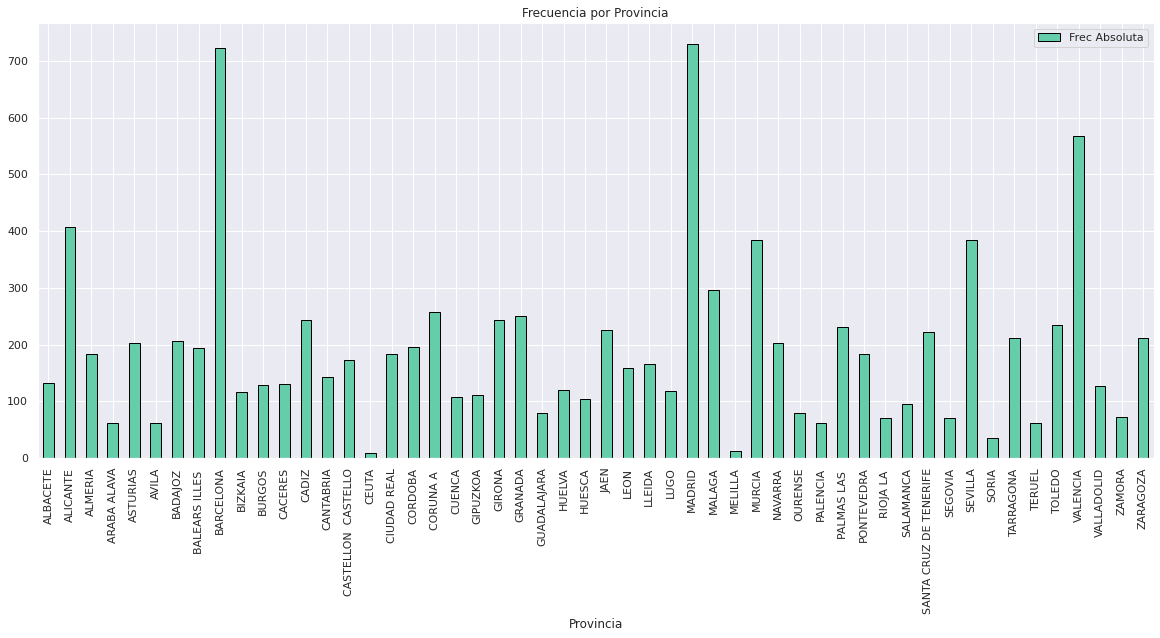

In [ ]:
# Frecuencia Absoluta
data_provincia.plot.bar(x='Provincia', y='Frec Absoluta', title="Frecuencia por Provincia",
                rot=90, width=0.5, color = 'mediumaquamarine', edgecolor='black', figsize=(20,8))
plt.show()

In [ ]:
# Obteniendo medidas de centralización
df['Provincia'].mode()

0    MADRID
dtype: object

**Análisis:** gracias a la tabla de distribución de frecuencias y al gráfico de barras, se puede observar como la provincia que más se repite en los datos es Madrid (moda), así mismo esta provincia tiene un 0.073066	o un 7.3066% de la cantidad de gasolineras (a nivel de dataset) que hay en toda España. Si se toma en cuenta que Madrid es la capital de España, tiene sentido que tenga la mayor cantidad de gasolineras seguida en segundo lugar por Barcelona y de tercera por Valencia; ambos lugares muy turísticos. 

Por otro lado se puede ver que en la provincia que hay menos gasolineras es en Ceuta, ya que tiene solo 9 gasolineras (o al menos eso se puede visualizar a nivel de dataset) y estas solo representan el 0.000901, es decir, menos de un 1% de las gasolineras totales en España. 

Como esta variable de de tipo cualitativo, no se pueden obtener los demás estadísticos. 

**Analizando variable Margen:**

In [ ]:
# Copy df con la variable Margen:
data_margen = df['Margen'].copy(deep='True')
data_margen = pd.DataFrame(data_margen)

# Agregando tabla de frecuencias del tipo de clase

# Frecuencia Absoluta
data_margen['Frec Absoluta'] = data_margen.groupby('Margen')['Margen'].transform('count')
data_margen = data_margen.drop_duplicates()

data_margen = data_margen.sort_values(by ='Margen' )

# Frecuencia Absoluta Acumulada
data_margen['Frec Absoluta Acum'] = data_margen['Frec Absoluta'].cumsum()

# Frecuencia Relativa
data_margen['Frec Relativa'] = data_margen['Frec Absoluta'] / data_margen['Frec Absoluta'].sum() 

# Frecuencia Relativa Acumulada
data_margen['Frec Relativa Acum'] = data_margen['Frec Absoluta'].cumsum()/data_margen['Frec Absoluta'].sum()

# View df
data_margen

,Margen,Frec Absoluta,Frec Absoluta Acum,Frec Relativa,Frec Relativa Acum
0,D,5016,5016,0.502052,0.502052
18,I,2596,7612,0.259834,0.761886
3,N,2379,9991,0.238114,1.000000


Con esta variable se puede crear un gráfico de barras así como un gráfico de pastel o de quesitos, ya que tiene pocas categorías. 

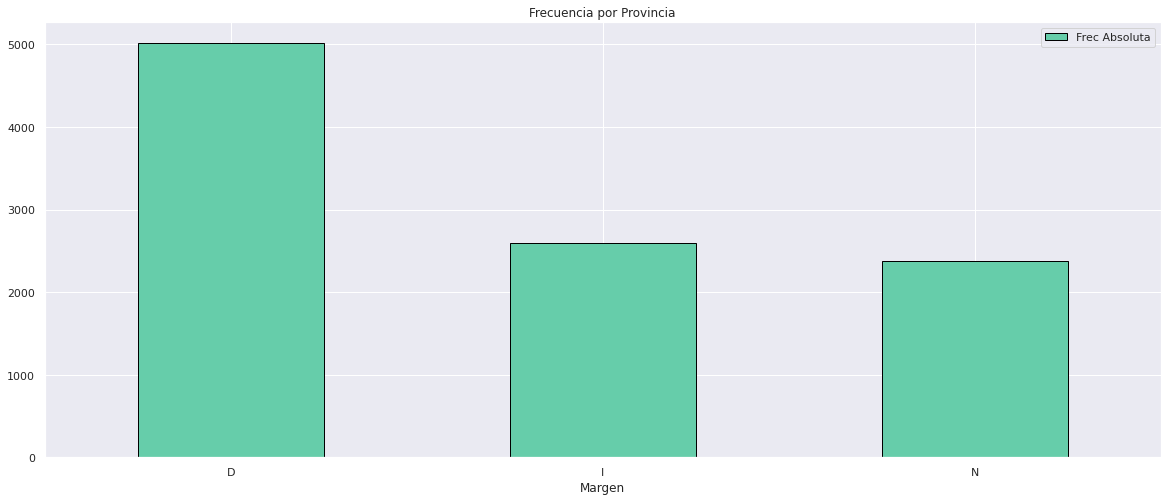

In [ ]:
# Frecuencia Absoluta
data_margen.plot.bar(x='Margen', y='Frec Absoluta', title="Frecuencia por Provincia",
                rot=0, width=0.5, color = 'mediumaquamarine', edgecolor='black', figsize=(20,8))
plt.show()

In [ ]:
# Creando gráfico de pastel

import plotly.express as px

fig = px.pie(data_margen, values='Frec Absoluta', names='Margen', title='Distribución por Margen')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
# Obteniendo medidas de centralización
df['Margen'].mode()

0    D
dtype: object

**Análisis:** se puede observar en el gráfico de barras que el Margen que más se repite es el "D"(Moda) con 5016 observaciones, asimismo, se puede observar que el "I" cuenta con 2596 observaciones y "N" con 2379 observaciones. A nivel relativo "D" representa el 50.20% de los datos, "I" 25.98% y finalmente "N" representa un 23.81% del total. Es interesante ver como "I" y "N" casi tienen la misma cantidad de representación y observaciones. 

Como esta variable de de tipo cualitativo, no se pueden obtener los demás estadísticos.

**Analizando variable precio agrupando los datos:**

In [ ]:
# Obteniendo la cantidad de clases 

# Obteniendo mínimo
print(df['Precio'].min())

# Obteniendo máximo
print(df['Precio'].max())

# Obteniendo intervalo
print((df['Precio'].max() - df['Precio'].min()) / 13) 
# Se obtiene el número 13 utilizando la regla de Sturges y redondeando al resultado impar, en este caso 13, ya que puede ser 13 o 14 clases. 

0.758
1.448
0.05307692307692307


In [ ]:
# Copy deep df con la variable Precio
df_price = df['Precio'].copy(deep='True')

data_Precio = pd.DataFrame(df_price)

# Clasificación del precio
conditions = [
       ( (data_Precio['Precio'] >= 0.758)  & (data_Precio['Precio'] < 0.811)  ) ,
       ( (data_Precio['Precio'] >= 0.811) & (data_Precio['Precio'] < 0.864) ) ,
       ( (data_Precio['Precio'] >= 0.864) & (data_Precio['Precio'] < 0.917) ) ,
       ( (data_Precio['Precio'] >= 0.917) & (data_Precio['Precio'] < 0.97) ) ,
       ( (data_Precio['Precio'] >= 0.97) & (data_Precio['Precio'] < 1.023) ) ,
       ( (data_Precio['Precio'] >= 1.023)  & (data_Precio['Precio'] < 1.076)  ) ,
       ( (data_Precio['Precio'] >= 1.076) & (data_Precio['Precio'] < 1.129) ) ,
       ( (data_Precio['Precio'] >= 1.129) & (data_Precio['Precio'] < 1.182) ) ,
       ( (data_Precio['Precio'] >= 1.182) & (data_Precio['Precio'] < 1.235) ) ,
       ( (data_Precio['Precio'] >= 1.235) & (data_Precio['Precio'] < 1.288) ) ,
       ( (data_Precio['Precio'] >= 1.288) & (data_Precio['Precio'] < 1.341) ) ,
       ( (data_Precio['Precio'] >= 1.341) & (data_Precio['Precio'] < 1.394) ) ,
       (data_Precio['Precio'] >= 1.394 )  ]
choices = ['[0.7578, 0.811)', '[0.811, 0.864)', 
           '[0.864, 0.917)', '[0.917, 0.97)', '[0.97, 1.023)', '[1.023, 1.076)', '[1.076, 1.129)', '[1.129, 1.182)',
           '[1.182, 1.235)', '[1.235, 1.288)', '[1.288, 1.341)', '[1.341, 1.394)', '[1.394, 1.448)']
data_Precio['Rango_Precio'] = np.select(conditions, choices, default='n/a')


# View df
data_Precio

,Precio,Rango_Precio
0,0.758,"[0.7578, 0.811)"
1,0.759,"[0.7578, 0.811)"
2,0.769,"[0.7578, 0.811)"
3,0.789,"[0.7578, 0.811)"
4,0.789,"[0.7578, 0.811)"
...,...,...
9986,1.309,"[1.288, 1.341)"
9987,1.349,"[1.341, 1.394)"
9988,1.349,"[1.341, 1.394)"
9989,1.430,"[1.394, 1.448)"


In [ ]:
# Se elimina precio para hacer bien la agrupación
data_Precio.drop(['Precio'], axis='columns', inplace=True)

# Add Tabla de frecuencias del tipo de clase

## Frecuencia Absoluta
data_Precio['Frec Absoluta'] = data_Precio.groupby('Rango_Precio')['Rango_Precio'].transform('count')
data_Precio = data_Precio.drop_duplicates()
data_Precio = data_Precio.sort_values(by ='Rango_Precio' )

## Frecuencia Absoluta Acumulada
data_Precio['Frec Absoluta Acum'] = data_Precio['Frec Absoluta'].cumsum()

## Frecuencia Relativa
data_Precio['Frec Relativa'] = data_Precio['Frec Absoluta'] / data_Precio['Frec Absoluta'].sum() 

## Frecuencia Relativa Acumulada
data_Precio['Frec Relativa Acum'] = data_Precio['Frec Absoluta'].cumsum()/data_Precio['Frec Absoluta'].sum()

# View df
data_Precio

,Rango_Precio,Frec Absoluta,Frec Absoluta Acum,Frec Relativa,Frec Relativa Acum
0,"[0.7578, 0.811)",6,6,0.000601,0.000601
6,"[0.811, 0.864)",37,43,0.003703,0.004304
43,"[0.864, 0.917)",114,157,0.011410,0.015714
157,"[0.917, 0.97)",107,264,0.010710,0.026424
264,"[0.97, 1.023)",318,582,0.031829,0.058252
582,"[1.023, 1.076)",733,1315,0.073366,0.131618
1315,"[1.076, 1.129)",1307,2622,0.130818,0.262436
2622,"[1.129, 1.182)",2989,5611,0.299169,0.561605
5611,"[1.182, 1.235)",3458,9069,0.346112,0.907717
9069,"[1.235, 1.288)",907,9976,0.090782,0.998499


<Figure size 1440x720 with 0 Axes>

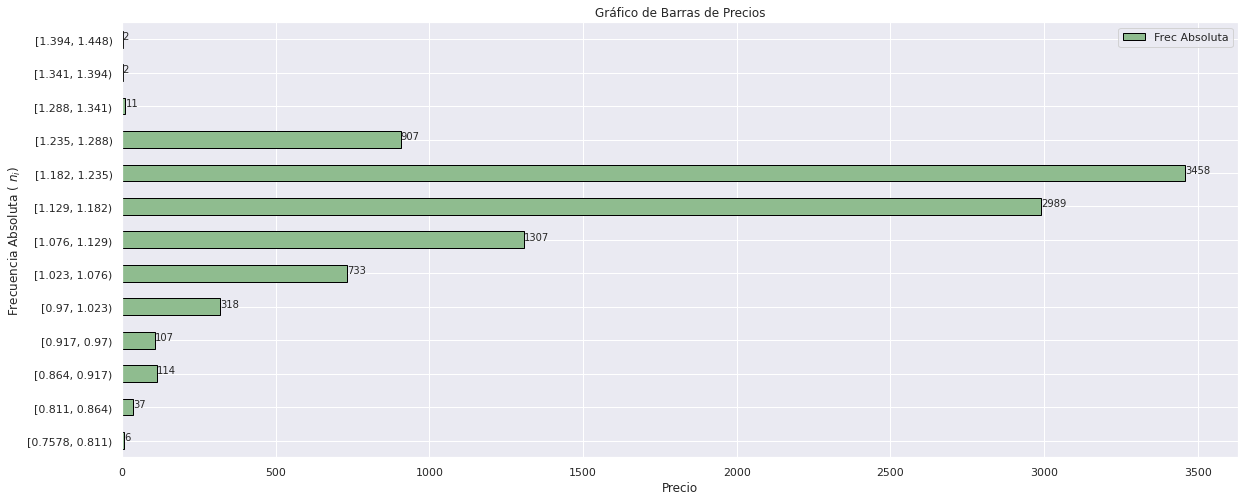

In [ ]:
# Gráfico de Barras de Precio 
plt.figure(figsize=(20,10))

y = data_Precio['Frec Absoluta'] 

data_Precio.plot.barh(x='Rango_Precio', y='Frec Absoluta', color = "darkseagreen",
                      edgecolor='black', rot=0, width=0.5, figsize=(20,8))
plt.title("Gráfico de Barras de Precios")
plt.ylabel("Frecuencia Absoluta ( $n_{i}$) ")
plt.xlabel("Precio")

for index, value in enumerate(y): 
    plt.text(value, index, 
             str(value))

plt.show();

**Análisis datos agrupados - variable precio** 

A nivel del gráfico de barras con la creación de clases se puede visualizar que la clase que tiene la mayor cantidad de datos es la que va de [1.182 a 1.235) con 3458 observaciones la segunda es la que va de [1.129 a 1.182) con 2989 observaciones. Las clases que cuentan con la menor cantidad de observaciones son: [1.341 a 1.394) y [1.394 a 1.448) con solo dos observaciones (ambas). 

**Analizando variable precio sin agrupar los datos:**

Asimetría: -1.413981
Curtosis:  2.692250


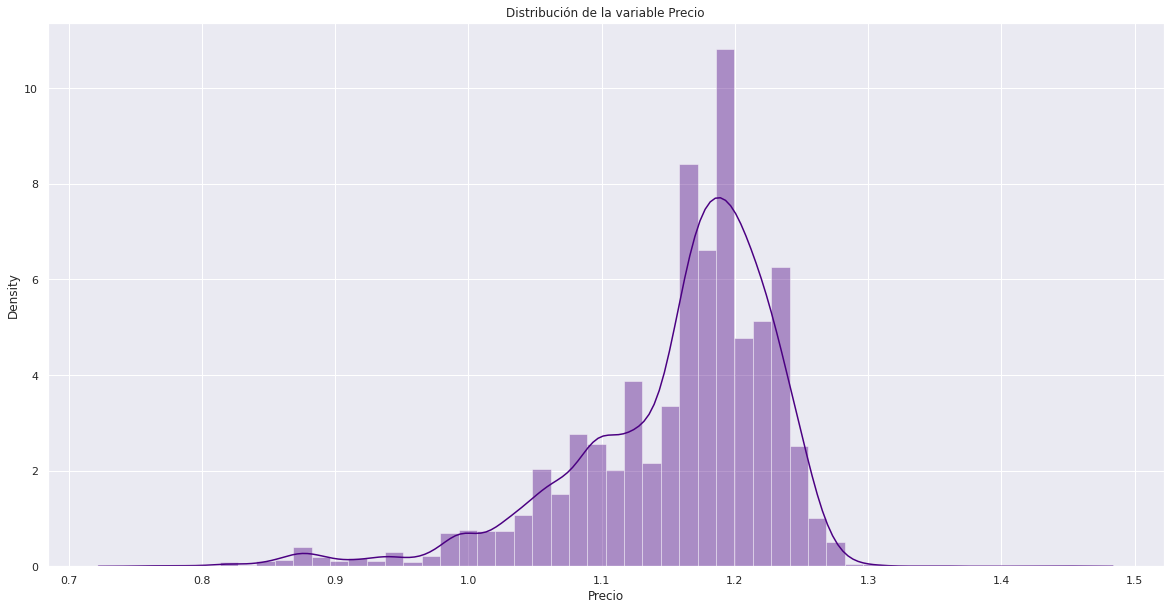

In [ ]:
# Análisis de la distribución con la variable original de Precio, sin tomar en cuenta clases creadas. 
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as ss

print("Asimetría: %f" % df["Precio"].skew())
print("Curtosis:  %f" % df["Precio"].kurt())


# Gráfico de la distribución
plt.figure(figsize=(20,10))
plt.title("Distribución de la variable Precio")
sns.distplot(df["Precio"], color = 'indigo')
plt.show()

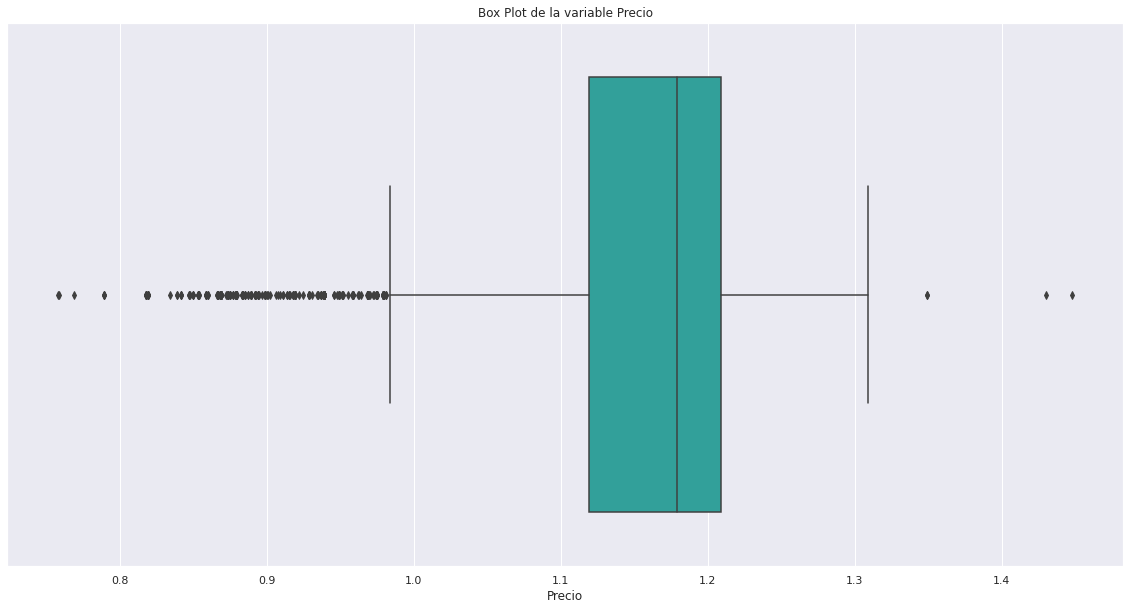

In [ ]:
# Box-plot de la variable original de precio
plt.figure(figsize=(20,10))
plt.title("Box Plot de la variable Precio")
sns.boxplot(df["Precio"], color = "lightseagreen")
plt.show()

In [ ]:
# Obteniendo medidas de posición central 
df['Precio'].describe()

count    9991.000000
mean        1.157277
std         0.075267
min         0.758000
25%         1.119000
50%         1.179000
75%         1.209000
max         1.448000
Name: Precio, dtype: float64

**Análisis datos no agrupados - variable precio** 

A nivel de la variable precio en general (sin tomar en cuenta las clases que se hicieron): se puede observar que la variable precio, cuenta con una media de 1.157277 este valor se ve impactado por las observaciones que tienen precios muy bajos, ya que en el gráfico de Box Plot se puede observar como los precios que están por debajo de 0.98 son considerados outliers, aunque también hay outliers en los precios que están por encima de 1.31, aunque en este caso son solo 3. 

El valor más pequeño que presenta esta variable es 0.75800, mientras que el máximo es de 1.448. Se puede observar que la mediana es de 1.179000, es decir, 50% de los datos son iguales o mayores a 1.179000 o dicho de otra forma, el 50% de los datos son iguales o menores a 1.17900. Asimismo, el tercer cuartil muestra que el 75% de los datos son iguales o menores a 1.209000, mientras que 25% de los datos restantes son iguales o mayores a 1.209000. 

En cuanto al primer cuartil se puede observar que este es de 1.119000 por lo que el 25% de los datos son iguales o menores a 1.119000 o se puede decir, que el 75% de los datos son iguales o mayores a 1.119000.

Por otro lado la asimetría de la variable se puede visualizar que es negativa y la curtosis es leptocúrtica o con más centración en valores centrales. Por último con el gráfico de box plot se puede concluir que no hay mucha dispersión de los datos. 